In [1]:
# 키워드 분석(Keyword Analysis)
# 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구

# 네이버 영화 리뷰 데이터
# 키워드 분석에는 네이버 영화 리뷰 데이터를 사용

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-white')

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

C:\Users\user\AppData\Local\Temp\ipykernel_6688\90172063.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [2]:
# 문자열 변환
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
    
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [3]:
# 형태소 분석기 Mecab으로 명사만 추출

from konlpy.tag import Mecab
tagger = Mecab(r'C:\mecab\mecab-ko-dic')

nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        nouns.append(noun)
        
nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

In [4]:
# 불용어(Stopwords) 사전 만들기

# 형태소 분석을 통해 조사, 접속사 등의 제거 가능
# 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
# 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
# 불용어 예: 전 날 일 걸 뭐 출 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것
# 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요(예: 영화)
stop_words = '영화 날 일 걸 뭐 출 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'
stop_words = stop_words.split(' ')

In [5]:
# 불용어를 제외하여 형태소 분석 수행
nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            nouns.append(noun)
            
nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

In [6]:
# 단어 빈도수 측정

# 단어 빈도수 측정에는 collections 라이브러리의 counter 함수를 이용
# collections 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
# counter 이용 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns


{'연기': 9175,
 '최고': 8813,
 '평점': 8514,
 '스토리': 7163,
 '생각': 6943,
 '드라마': 6896,
 '사람': 6742,
 '감동': 6489,
 '배우': 5893,
 '내용': 5731,
 '감독': 5629,
 '재미': 5479,
 '시간': 5320,
 '년': 4936,
 '사랑': 4741,
 '쓰레기': 4585,
 '작품': 3985,
 '하나': 3923,
 '정도': 3656,
 '이건': 3650,
 '마지막': 3647,
 '액션': 3568,
 '기대': 3465,
 '장면': 3262,
 '이게': 3046,
 '줄': 3045,
 '편': 3044,
 '최악': 3019,
 '돈': 2980,
 '이야기': 2947,
 '이해': 2745,
 '애': 2730,
 '명작': 2685,
 '여자': 2678,
 '이상': 2676,
 '처음': 2673,
 '한국': 2640,
 '주인공': 2553,
 '우리': 2531,
 '연출': 2376,
 '때문': 2371,
 '기억': 2364,
 '현실': 2193,
 '난': 2189,
 '마음': 2128,
 '전': 2125,
 '굿': 2110,
 '남자': 2078,
 '결말': 2066,
 '인생': 2060}

In [7]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
from matplotlib import rc

font_path = 'C:\\Windows\\Fonts\\HancomUljuBangudaePetroglyph.ttf'
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

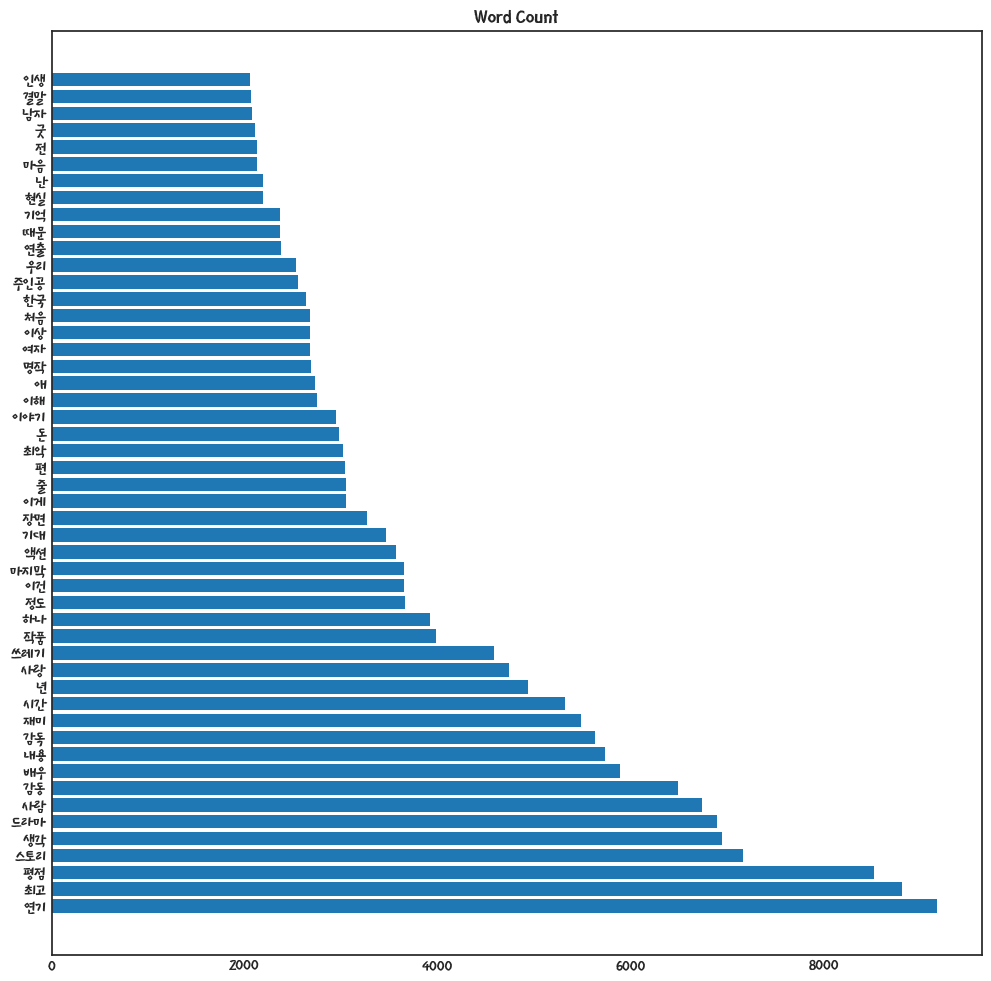

In [8]:
# 단어 빈도 시각화
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

In [9]:
# 워드 클라우드
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', font_path='C:\\Windows\\Fonts\\HancomUljuBangudaePetroglyph.ttf')
wc.generate_from_frequencies(top_nouns)

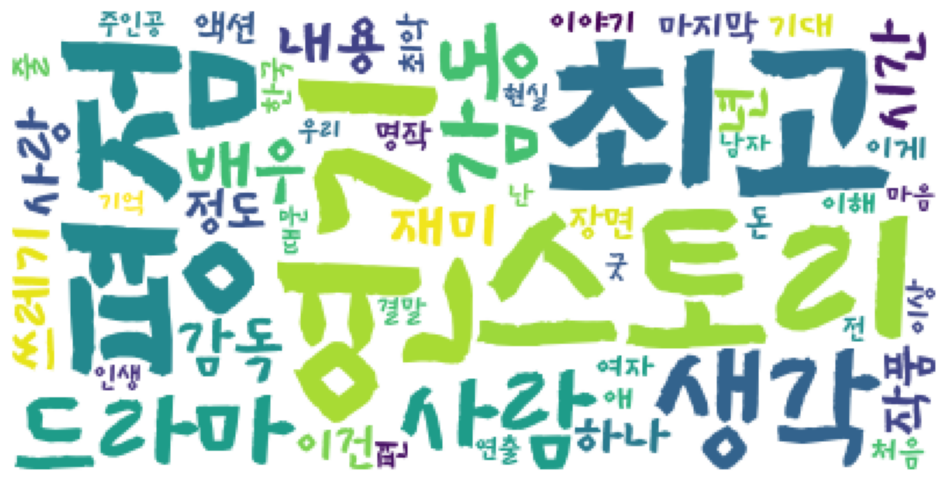

In [10]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)

<Axes: >

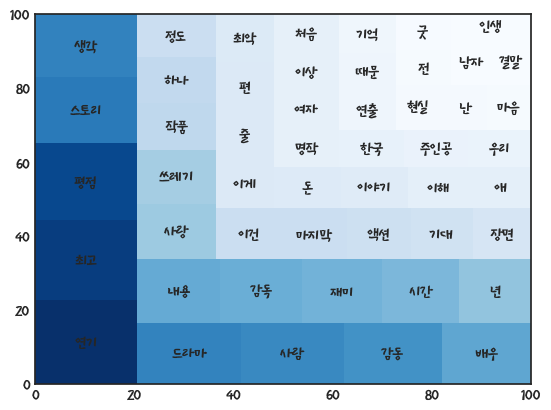

In [14]:
# squarify 트리맵 시각화
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors)